# **Кейс №3. Проходной порог. Алексеев Виталий**

## **0 Импорт библиотек**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import pandas as pd
plt.style.use('ggplot')

## **1 Создание моделей**

Поскольку каждое задание решается независимо друг от друга, а сложность подбирается одинаково для каждого, то весь тест можно описать серией испытаний Бернулли:
$$test\sim \text{Bin}(n, p)$$
В нашем кейсе $n=20$, а $p$ зависит от выбранного уровня сложности. Условие "Как на работе" эквивалентно следующему:
$$\mathbf{P}(\text{Сильный кандидат решит})=0,98$$
$$\mathbf{P}(\text{Слабый кандидат решит})=0,90$$
Условие "Вероятность прохождения теста сильным кандидатом должна быть не меньше 80%" эквивалентно:
$$\mathbf{P}(X\ge N)=1-CDF_X(N)+PMF_X(N)\ge0,8\iff CDF_X(N)-PMF_X(N)\le 0,2$$
Где $N$ - выбранный порог.

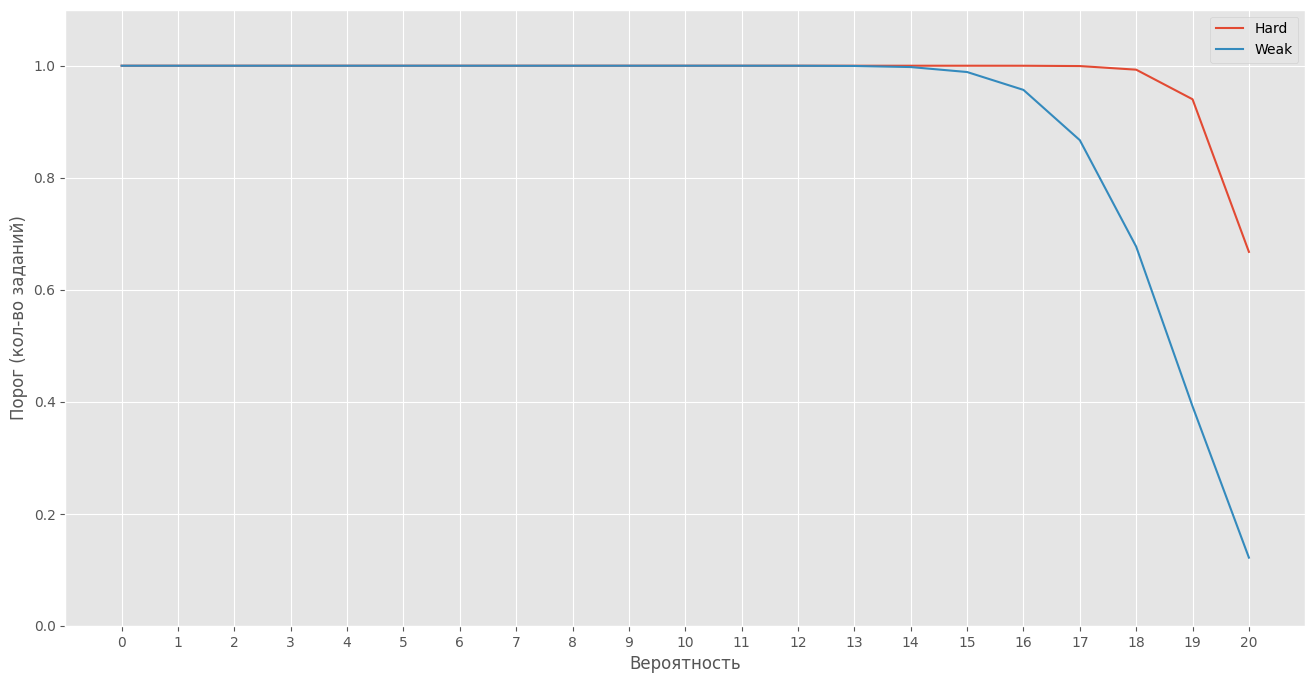

In [103]:
test_hard = sps.binom(20, 0.98)
test_weak = sps.binom(20, 0.90)

probabilities_hard = []
probabilities_weak = []

for N in np.arange(21):
    probabilities_hard.append(1 - test_hard.cdf(N) + test_hard.pmf(N))
    probabilities_weak.append(1 - test_weak.cdf(N) + test_weak.pmf(N))

fig = plt.figure(figsize=(16, 8))
plt.plot(np.arange(21), probabilities_hard)
plt.plot(np.arange(21), probabilities_weak)
plt.legend(['Hard', 'Weak'])
plt.xticks(np.arange(21))
plt.ylabel("Порог (кол-во заданий)")
plt.xlabel("Вероятность")
plt.ylim([0, 1.1])
plt.show()

Очевидно, что выбирать порог $0\le n\le14$ не имеет смысла, поскольку все кандидаты пройдут тест, то же верно и для $n=20$ - в этом случае $\sim 60 \%$ слабых кандидатов провалят тестирование, так же тестирование провалят ощутимое число кандидатов.

Исходя из этого, $n=18$ - лучшее решение, поскольку оно отсеивает достаточное число неопытных кандидатов, сохраняя при этом практически всех опытных.

## **2 Поиск оптимального числа вопрос и порога одновременно**

Выберем сначала такое число $N$, которое позволит отсеить достаточное кол-во неопытных кандидатов (минимум $70\%$), т.е. вероятость пройти тест для них должна составлять менее $0,3$:
$$\mathbf{P}(X\ge N)\le 0,3$$
Для найденного $N$ определим максимальный порог, сохраняющий высокую долю опытных кандидатов, для них получаем уже ранее записанное выражение.

In [104]:
max_N = 0
end = False
while not end:
    max_N += 1
    test_weak = sps.binom(max_N, 0.90)
    for N in np.arange(max_N):
        if 1 - test_weak.cdf(N) + test_weak.pmf(N) <= 0.3:
            print("Минимальное число вопросов, порог: ", max_N, N)
            end = True
            break

test_hard = sps.binom(max_N, 0.99)
for N in range(max_N, 0, - 1):
    if 1 - test_hard.cdf(N) + test_hard.pmf(N) >= 0.8:
        print("Максимальный порог для N:", N)
        break

Минимальное число вопросов, порог:  24 23
Максимальный порог для N: 23


Таким образом, при числе вопросов, равном 24, и пороге - 23, получаем вероятности, удовлетворяющие данным условиям.

*Ремарка: поскольку получили максимальный порог, больший минимального (очевидно), то и для меньшего порога условие на долю опытных кандидатов будет выполняться*

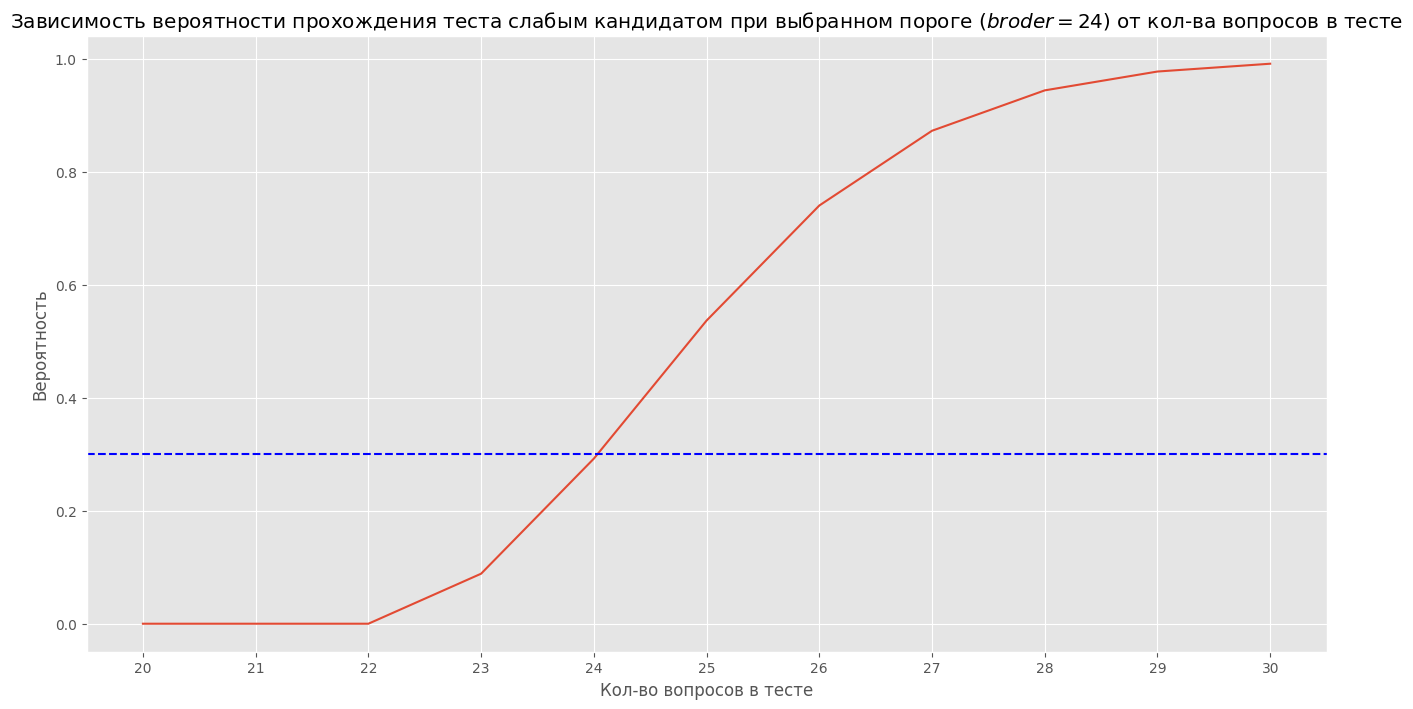

In [105]:
border = 23
probabilities = []
for N in range(20, 31):
    test_weak = sps.binom(N, 0.90)
    probabilities.append(1 - test_weak.cdf(border) + test_weak.pmf(border))

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xticks(np.arange(20, 31))
ax.plot(np.arange(20, 31), probabilities)
ax.set_title(
    "Зависимость вероятности прохождения теста слабым кандидатом при выбранном пороге ($broder=24$) от кол-ва вопросов в тесте"
)
ax.set_xlabel("Кол-во вопросов в тесте")
ax.set_ylabel("Вероятность")
ax.axhline(0.3, color="b", linestyle="--")
plt.show()

## **3 Другой уровень сложности**

В контексте вероятности (уровень сложности: "Проще чем на работе"), изменятся вероятность успеха в каждом из вопросов теста:
$$\mathbf{P}(\text{Сильный кандидат решит})=0,99$$
$$\mathbf{P}(\text{Слабый кандидат решит})=0,95$$
Проведем аналогичные расчеты и графики.

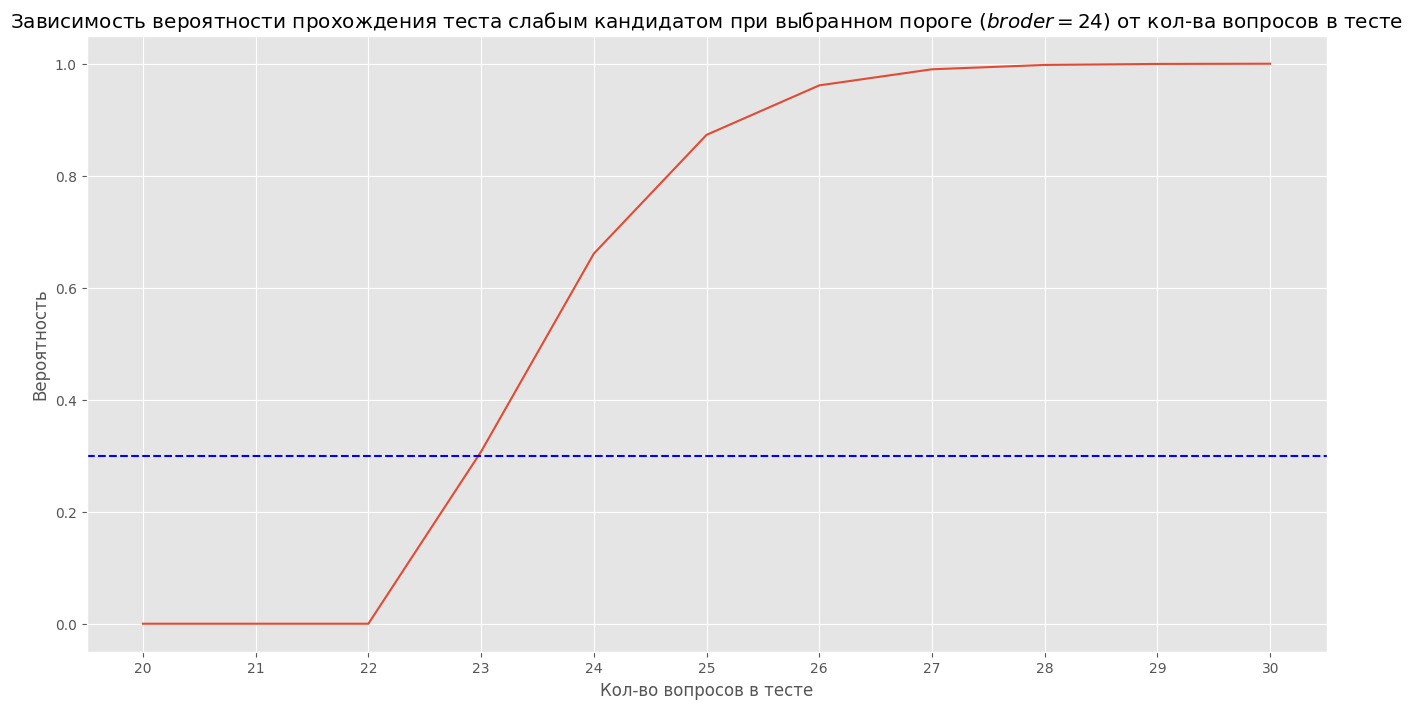

In [106]:
border = 23
probabilities = []
for N in range(20, 31):
    test_weak = sps.binom(N, 0.95)
    probabilities.append(1 - test_weak.cdf(border) + test_weak.pmf(border))

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xticks(np.arange(20, 31))
ax.plot(np.arange(20, 31), probabilities)
ax.set_title(
    "Зависимость вероятности прохождения теста слабым кандидатом при выбранном пороге ($broder=24$) от кол-ва вопросов в тесте"
)
ax.set_xlabel("Кол-во вопросов в тесте")
ax.set_ylabel("Вероятность")
ax.axhline(0.3, color="b", linestyle="--")
plt.show()

Видно, что при том же пороге, вероятность решить тест уже больше $0,3$, поэтому его, как и общее число необходимо пересчитать.

In [107]:
max_N = 0
end = False
while not end:
    max_N += 1
    test_weak = sps.binom(max_N, 0.95)
    for N in np.arange(max_N):
        if 1 - test_weak.cdf(N) + test_weak.pmf(N) <= 0.3:
            print("Минимальное число вопросов, порог: ", max_N, N)
            end = True
            break

test_hard = sps.binom(max_N, 0.99)
for N in range(max_N, 0, -1):
    if 1 - test_hard.cdf(N) + test_hard.pmf(N) >= 0.8:
        print("Максимальный порог для N:", N)
        break

Минимальное число вопросов, порог:  49 48
Максимальный порог для N: 48


Получаем, что необходимо взять в два (!) раза больше вопросов, чтобы сохранить долю непрошедших неопытных кандидатов. С учетом этого, перестроим график:

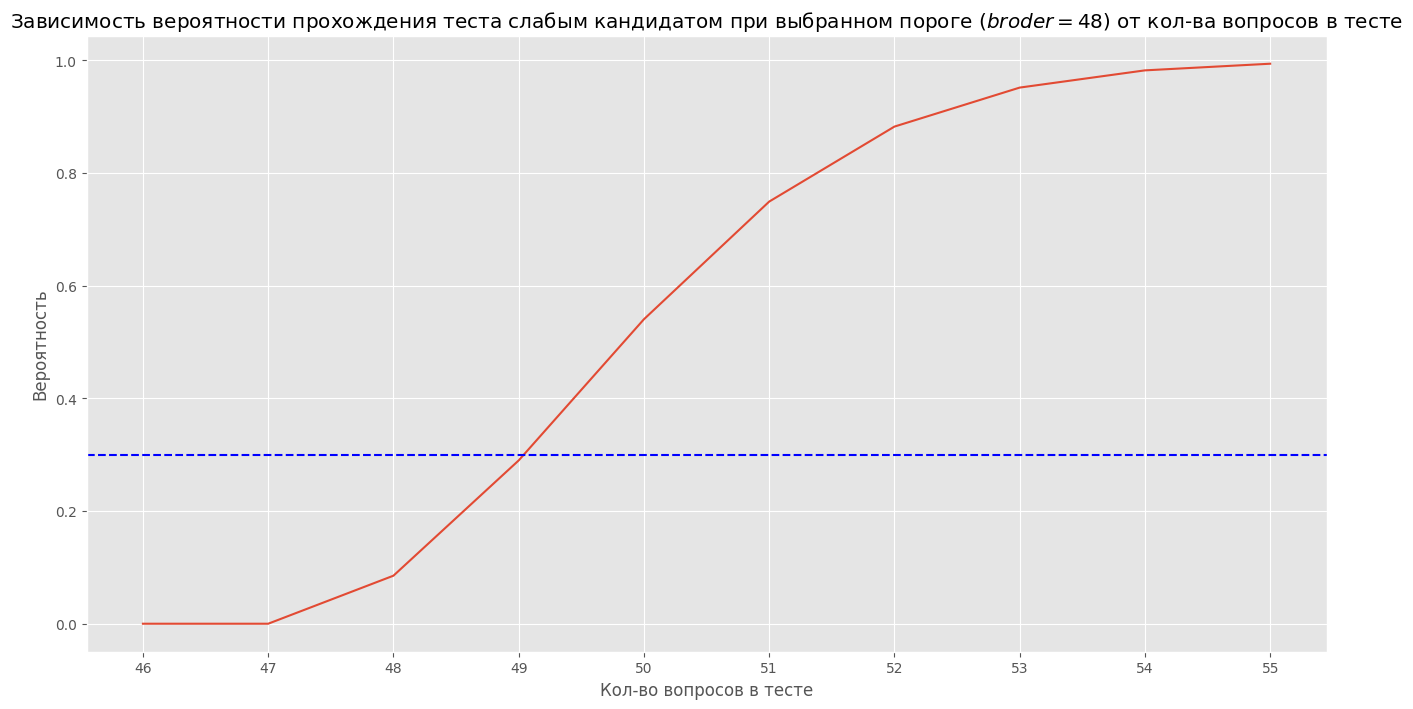

In [108]:
border = 48
probabilities = []
for N in range(46, 56):
    test_weak = sps.binom(N, 0.95)
    probabilities.append(1 - test_weak.cdf(border) + test_weak.pmf(border))

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xticks(np.arange(46, 56))
ax.plot(np.arange(46, 56), probabilities)
ax.set_title(
    "Зависимость вероятности прохождения теста слабым кандидатом при выбранном пороге ($broder=48$) от кол-ва вопросов в тесте"
)
ax.set_xlabel("Кол-во вопросов в тесте")
ax.set_ylabel("Вероятность")
ax.axhline(0.3, color="b", linestyle="--")
plt.show()

Еще раз сменим уровень сложности, "Сложнее, чем на работе", т.е.:
$$\mathbf{P}(\text{Сильный кандидат решит})=0,7$$
$$\mathbf{P}(\text{Слабый кандидат решит})=0,2$$

In [109]:
max_N = 0
end = False
while not end:
    max_N += 1
    test_weak = sps.binom(max_N, 0.2)
    for N in np.arange(max_N):
        if 1 - test_weak.cdf(N) + test_weak.pmf(N) <= 0.3:
            print("Минимальное число вопросов, порог: ", max_N, N)
            end = True
            break

test_hard = sps.binom(max_N, 0.7)
for N in range(max_N, 0, -1):
    if 1 - test_hard.cdf(N) + test_hard.pmf(N) >= 0.8:
        print("Максимальный порог для N:", N)
        break

Минимальное число вопросов, порог:  3 2
Максимальный порог для N: 1


Получили, что предыдущая стратегия поиска не работает ($\max < \min$). Посмотрим на график функции распределения при $N=20$:

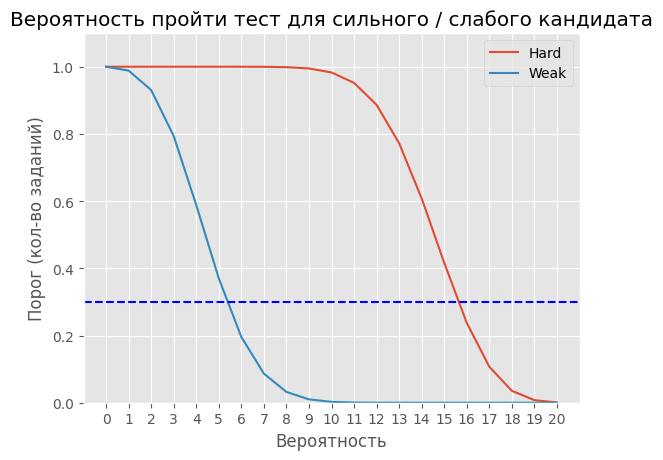

In [110]:
test_hard = sps.binom(20, 0.7)
test_weak = sps.binom(20, 0.2)

probabilities_hard = []
probabilities_weak = []

for N in np.arange(21):
    probabilities_hard.append(1 - test_hard.cdf(N) + test_hard.pmf(N))
    probabilities_weak.append(1 - test_weak.cdf(N) + test_weak.pmf(N))

plt.plot(np.arange(21), probabilities_hard)
plt.plot(np.arange(21), probabilities_weak)
plt.legend(['Hard', 'Weak'])
plt.xticks(np.arange(21))
plt.title("Вероятность пройти тест для сильного / слабого кандидата")
plt.ylabel("Порог (кол-во заданий)")
plt.xlabel("Вероятность")
plt.ylim([0, 1.1])
plt.axhline(0.3, color="b", linestyle="--")
plt.show()

Здесь, установив порог $n=6$, соблюдем оба условия, возьмем $N=10$:

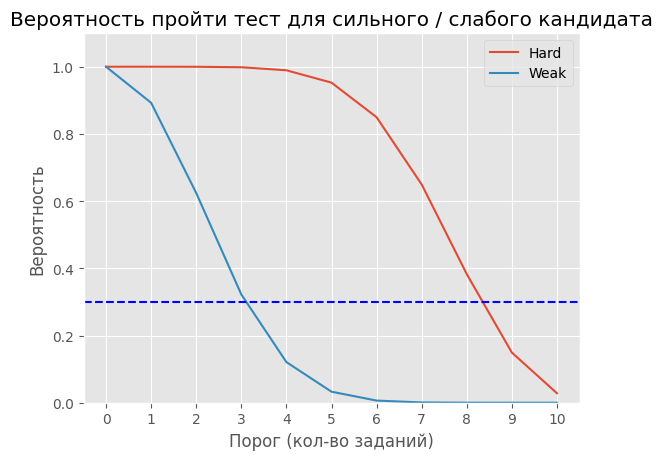

In [111]:
test_hard = sps.binom(10, 0.7)
test_weak = sps.binom(10, 0.2)

probabilities_hard = []
probabilities_weak = []

for N in np.arange(11):
    probabilities_hard.append(1 - test_hard.cdf(N) + test_hard.pmf(N))
    probabilities_weak.append(1 - test_weak.cdf(N) + test_weak.pmf(N))

plt.plot(np.arange(11), probabilities_hard)
plt.plot(np.arange(11), probabilities_weak)
plt.legend(['Hard', 'Weak'])
plt.xticks(np.arange(11))
plt.title("Вероятность пройти тест для сильного / слабого кандидата")
plt.xlabel("Порог (кол-во заданий)")
plt.ylabel("Вероятность")
plt.ylim([0, 1.1])
plt.axhline(0.3, color="b", linestyle="--")
plt.show()

Можно взять $n=4$, продолжим и построим графики до $n=4$:

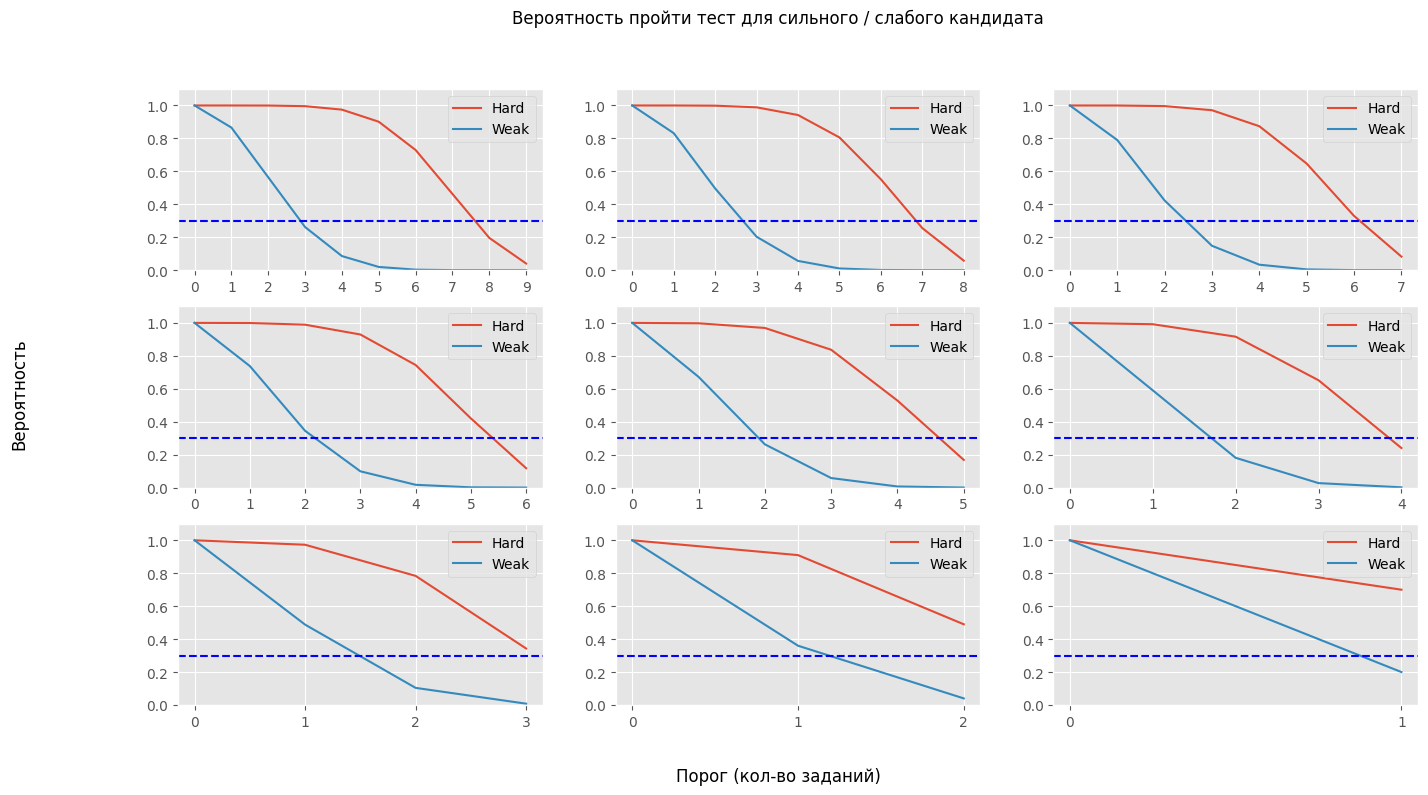

In [112]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    max_N = 9 - i
    test_hard = sps.binom(max_N, 0.7)
    test_weak = sps.binom(max_N, 0.2)

    probabilities_hard = []
    probabilities_weak = []

    for N in np.arange(max_N + 1):
        probabilities_hard.append(1 - test_hard.cdf(N) + test_hard.pmf(N))
        probabilities_weak.append(1 - test_weak.cdf(N) + test_weak.pmf(N))

    ax.plot(np.arange(max_N + 1), probabilities_hard)
    ax.plot(np.arange(max_N + 1), probabilities_weak)
    ax.legend(['Hard', 'Weak'])
    ax.set_xticks(np.arange(max_N + 1))
    ax.set_ylim([0, 1.1])
    ax.axhline(0.3, color="b", linestyle="--")
fig.supxlabel("Порог (кол-во заданий)")
fig.supylabel("Вероятность")
fig.suptitle("Вероятность пройти тест для сильного / слабого кандидата")
plt.show()

Таким образом, взяв кол-во заданий $N=4$, а порог $n=2$, получаем удовлетворяющую условию модель.

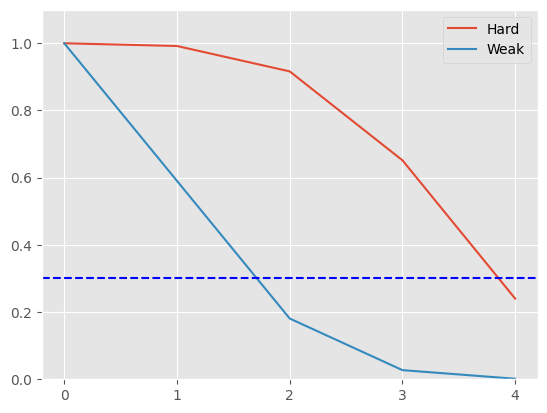

In [113]:
max_N = 4
test_hard = sps.binom(max_N, 0.7)
test_weak = sps.binom(max_N, 0.2)

probabilities_hard = []
probabilities_weak = []

for N in np.arange(max_N + 1):
    probabilities_hard.append(1 - test_hard.cdf(N) + test_hard.pmf(N))
    probabilities_weak.append(1 - test_weak.cdf(N) + test_weak.pmf(N))

plt.plot(np.arange(max_N + 1), probabilities_hard)
plt.plot(np.arange(max_N + 1), probabilities_weak)
plt.legend(['Hard', 'Weak'])
plt.xticks(np.arange(max_N + 1))
plt.ylim([0, 1.1])
plt.axhline(0.3, color="b", linestyle="--")

## **4 Итоги**

Имеем следующие три варианта:

In [114]:
model_easy_weak, model_easy_strong = sps.binom(49, 0.95), sps.binom(49, 0.99)
model_normal_weak, model_normal_strong = sps.binom(24, 0.90), sps.binom(24, 0.98)
model_hard_weak, model_hard_strong = sps.binom(4, 0.20), sps.binom(4, 0.70)

test_easier = [
    1 - model_easy_weak.cdf(48) + model_easy_weak.pmf(48),
    1 - model_easy_strong.cdf(48) + model_easy_strong.pmf(48),
]
test_normal = [
    1 - model_normal_weak.cdf(23) + model_normal_weak.pmf(23),
    1 - model_normal_strong.cdf(23) + model_normal_strong.pmf(23),
]
test_harder = [
    1 - model_hard_weak.cdf(2) + model_hard_weak.pmf(2),
    1 - model_hard_strong.cdf(2) + model_hard_strong.pmf(2),
]

df = pd.DataFrame({
    "Легче, чем на работе": test_easier + [49],
    "Как на работе": test_normal + [24],
    "Сложнее, чем на работе": test_harder + [4]
}, index=["Вероятность решить слабым кандидатом",
          "Вероятность решить сильным кандидатом",
          "Кол-во вопросов"])

df

,"Легче, чем на работе",Как на работе,"Сложнее, чем на работе"
Вероятность решить слабым кандидатом,0.289876,0.292477,0.1808
Вероятность решить сильным кандидатом,0.913589,0.917387,0.9163
Кол-во вопросов,49.000000,24.000000,4.0000


Из таблицы видно, что каждый из трех способов позволяет сохранить $\approx 92\%$ опытных кандидатов, поэтому смотреть будем на долю оставшихся неопытных кандидатов и число вопросов, оба критерия наилучшие в последнем столбце, т.е. когда уровень задач "**Сложнее, чем на работе**".